In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os 
import datetime
from scipy import stats
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

In [2]:
vis = pd.read_csv("vis_12_2021_01_2022.csv", index_col=[0])
vis.index = pd.to_datetime(vis.index, format="%d/%m/%Y")
vis

,ABK,ABE,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YOL,ZAR,YEN
date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,10.0,13.0,10.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,16.0,6.0,20.0,5.3,10.0,8.0,10.0
2021-12-02,10.0,10.0,10.0,10.0,8.0,10.0,10.0,1.5,10.0,10.0,...,NaN,20.0,7.0,NaN,10.0,20.0,20.0,1.0,3.0,NaN
2021-12-03,10.0,13.0,3.0,13.0,10.0,10.0,10.0,1.0,10.0,1.0,...,NaN,20.0,3.0,15.0,7.0,20.0,1.5,1.6,1.0,10.0
2021-12-04,8.0,12.0,5.0,4.5,8.0,8.0,8.0,6.0,6.0,1.0,...,NaN,15.0,4.0,8.0,8.0,10.0,1.5,2.0,2.0,10.0
2021-12-05,7.0,8.0,4.0,3.0,5.0,8.0,8.0,8.0,7.0,1.0,...,NaN,2.5,10.0,7.0,3.0,NaN,3.5,5.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,5.0,5.0,5.0,1.0,2.0,3.0,1.5,0.8,1.8,4.0,...,NaN,7.0,1.0,8.0,3.0,10.0,3.5,0.4,1.5,1.5
2022-01-28,2.5,5.0,1.0,0.5,1.8,2.5,1.6,0.8,2.2,0.8,...,NaN,7.0,0.8,NaN,3.0,10.0,1.0,0.6,1.0,1.5
2022-01-29,1.5,5.0,1.2,1.0,1.0,2.0,1.0,2.0,1.5,0.8,...,NaN,NaN,1.8,1.8,1.0,10.0,1.2,5.0,1.0,1.5


In [3]:
stn_coord = pd.read_csv("coords.csv")
stn = stn_coord["stn"]
stn_lat = stn_coord["lat"]
stn_lon = stn_coord["lon"]

In [4]:
# cap visibility maximum to 10km
vis.columns
for i in vis.columns:
    vis[i] = np.where(vis[i] > 10, 10, vis[i])
vis
# df["Income"] = np.where(df["Income"] <2960.0, 2960.0,df['Income'])

,ABK,ABE,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YOL,ZAR,YEN
date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,10.0,6.0,10.0,5.3,10.0,8.0,10.0
2021-12-02,10.0,10.0,10.0,10.0,8.0,10.0,10.0,1.5,10.0,10.0,...,NaN,10.0,7.0,NaN,10.0,10.0,10.0,1.0,3.0,NaN
2021-12-03,10.0,10.0,3.0,10.0,10.0,10.0,10.0,1.0,10.0,1.0,...,NaN,10.0,3.0,10.0,7.0,10.0,1.5,1.6,1.0,10.0
2021-12-04,8.0,10.0,5.0,4.5,8.0,8.0,8.0,6.0,6.0,1.0,...,NaN,10.0,4.0,8.0,8.0,10.0,1.5,2.0,2.0,10.0
2021-12-05,7.0,8.0,4.0,3.0,5.0,8.0,8.0,8.0,7.0,1.0,...,NaN,2.5,10.0,7.0,3.0,NaN,3.5,5.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,5.0,5.0,5.0,1.0,2.0,3.0,1.5,0.8,1.8,4.0,...,NaN,7.0,1.0,8.0,3.0,10.0,3.5,0.4,1.5,1.5
2022-01-28,2.5,5.0,1.0,0.5,1.8,2.5,1.6,0.8,2.2,0.8,...,NaN,7.0,0.8,NaN,3.0,10.0,1.0,0.6,1.0,1.5
2022-01-29,1.5,5.0,1.2,1.0,1.0,2.0,1.0,2.0,1.5,0.8,...,NaN,NaN,1.8,1.8,1.0,10.0,1.2,5.0,1.0,1.5


In [5]:
vis['KAN'].describe()

count    60.000000
mean      5.536667
std       3.545537
min       0.300000
25%       2.000000
50%       5.500000
75%      10.000000
max      10.000000
Name: KAN, dtype: float64

In [6]:
bsc = xr.open_dataset("nc_files/MULTI MODEL MEDIAN/20211206_3H_MEDIAN.nc")
bsc


<xarray.Dataset>
Dimensions:     (time: 21, latitude: 131, longitude: 171)
Coordinates:
  * longitude   (longitude) float32 -25.0 -24.5 -24.0 -23.5 ... 59.0 59.5 60.0
  * latitude    (latitude) float32 0.0 0.5 1.0 1.5 2.0 ... 63.5 64.0 64.5 65.0
  * time        (time) datetime64[ns] 2021-12-06T12:00:00 ... 2021-12-09
Data variables:
    SCONC_DUST  (time, latitude, longitude) float32 ...
    OD550_DUST  (time, latitude, longitude) float32 ...

In [7]:
# 7 15 
bsc.time.to_series()[15]

Timestamp('2021-12-08 09:00:00')

In [8]:
nc_files = os.listdir("nc_files/MULTI MODEL MEDIAN/")
len(nc_files)

62

In [9]:
day1_lead_all = pd.DataFrame(columns=["stn", "lon", "lat"])
for nc_file in nc_files:
    bsc = xr.open_dataset("nc_files/MULTI MODEL MEDIAN/"+nc_file)
    day1_lead = [["stn", "lon", "lat", bsc.OD550_DUST.time.to_series()[15]]]
    for i in range(len(stn)):
        day1_bsc = bsc.OD550_DUST.isel(time = 15).sel(latitude = stn_lat[i], 
                                                     longitude = stn_lon[i], 
                                                     method = 'nearest')
        day1_lead.append([stn[i], stn_lon[i], stn_lat[i], day1_bsc.to_dict()["data"]])
    day1_lead = pd.DataFrame(day1_lead[1:len(day1_lead)], columns = day1_lead[0])
    day1_lead_all = day1_lead_all.merge(day1_lead, 
                                        left_on=["stn", "lon", "lat"], 
                                        right_on=["stn", "lon", "lat"],
                                        how = "outer")
#data for 1 day leadtime for all sations
day1_lead_all

,stn,lon,lat,2021-12-03 09:00:00,2021-12-04 09:00:00,2021-12-05 09:00:00,2021-12-06 09:00:00,2021-12-07 09:00:00,2021-12-08 09:00:00,2021-12-09 09:00:00,...,2022-01-24 09:00:00,2022-01-25 09:00:00,2022-01-26 09:00:00,2022-01-27 09:00:00,2022-01-28 09:00:00,2022-01-29 09:00:00,2022-01-30 09:00:00,2022-01-31 09:00:00,2022-02-01 09:00:00,2022-02-02 09:00:00
0,ABE,3.33,7.20,0.161938,0.266602,0.299540,0.283116,0.162354,0.242348,0.192969,...,0.423383,0.339355,0.340250,0.306381,0.355668,0.830564,0.679956,0.429744,0.401823,0.400381
1,ABK,8.19,6.25,0.266947,0.338469,0.301388,0.266191,0.195557,0.249986,0.263250,...,0.333204,0.342508,0.388814,0.343491,0.693687,0.775289,0.587162,0.412550,0.420775,0.411939
2,ABU,7.20,9.00,0.281256,0.390408,0.394093,0.400738,0.264499,0.404321,0.347104,...,0.435719,0.381442,0.392573,0.460800,0.778178,0.833044,0.456140,0.405825,0.341427,0.453253
3,ADO,5.20,7.60,0.273273,0.312132,0.295835,0.306196,0.207278,0.286480,0.234414,...,0.388820,0.316908,0.307537,0.395291,0.426143,0.749077,0.620302,0.345378,0.338316,0.325684
4,AKU,5.30,7.20,0.284524,0.262800,0.316368,0.345814,0.090132,0.286062,0.241211,...,0.449791,0.328125,0.337608,0.415580,0.527867,0.731586,0.614140,0.377728,0.371962,0.370612
5,ASA,6.23,6.82,0.289643,0.258298,0.322850,0.338867,0.173828,0.281376,0.265278,...,0.443663,0.356445,0.363052,0.417628,0.613787,0.736156,0.587932,0.373104,0.379543,0.355675
6,AWK,7.07,6.20,0.266808,0.320964,0.301067,0.255050,0.149414,0.265581,0.259871,...,0.347340,0.334684,0.383694,0.367739,0.622920,0.776704,0.539982,0.406915,0.461809,0.402276
7,BAU,9.82,10.28,0.594048,0.505834,0.321039,0.365527,0.328304,0.359634,0.643589,...,0.233937,0.305705,0.456731,0.748863,0.742529,0.556977,0.428733,0.342695,0.639227,0.451489
8,BEN,5.60,6.33,0.214732,0.236694,0.283618,0.276398,0.165527,0.256058,0.251270,...,0.416847,0.399658,0.351393,0.426722,0.532525,0.799052,0.586026,0.432310,0.489515,0.403046
9,BID,6.00,9.80,0.460136,0.583550,0.513834,0.406250,0.386719,0.388785,0.466418,...,0.355822,0.321413,0.366183,0.523437,1.058367,0.612055,0.368951,0.283903,0.380135,0.564380


In [10]:
day1_lead_all_t = day1_lead_all.transpose()
day1_lead_all_t.columns = day1_lead_all_t.iloc[0]
day1_lead_all_t = day1_lead_all_t.drop(["lon", "lat", "stn"])

# multiply AOD by 10
# day1_lead_all_t = day1_lead_all_t * 10

day1_lead_all_t = day1_lead_all_t.reset_index()
day1_lead_all_t

stn,index,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
0,2021-12-03 09:00:00,0.161938,0.266947,0.281256,0.273273,0.284524,0.289643,0.266808,0.594048,0.214732,...,0.572495,0.228018,0.337891,0.233936,0.205765,0.169826,0.423321,0.137518,0.602088,0.389468
1,2021-12-04 09:00:00,0.266602,0.338469,0.390408,0.312132,0.2628,0.258298,0.320964,0.505834,0.236694,...,0.483207,0.289795,0.435864,0.311415,0.31245,0.191365,0.511067,0.255371,0.406047,0.395888
2,2021-12-05 09:00:00,0.29954,0.301388,0.394093,0.295835,0.316368,0.32285,0.301067,0.321039,0.283618,...,0.280598,0.352022,0.359308,0.266931,0.235055,0.23419,0.515938,0.227202,0.249047,0.315967
3,2021-12-06 09:00:00,0.283116,0.266191,0.400738,0.306196,0.345814,0.338867,0.25505,0.365527,0.276398,...,0.38672,0.389372,0.397476,0.243581,0.236208,0.239452,0.356373,0.227738,0.190748,0.307899
4,2021-12-07 09:00:00,0.162354,0.195557,0.264499,0.207278,0.090132,0.173828,0.149414,0.328304,0.165527,...,0.289278,0.221924,0.34668,0.146851,0.150879,0.092505,0.386719,0.08313,0.276663,0.299175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2022-01-29 09:00:00,0.830564,0.775289,0.833044,0.749077,0.731586,0.736156,0.776704,0.556977,0.799052,...,0.430917,0.936012,0.509114,0.652125,0.557634,0.679047,0.622798,0.534505,0.530382,0.484377
58,2022-01-30 09:00:00,0.679956,0.587162,0.45614,0.620302,0.61414,0.587932,0.539982,0.428733,0.586026,...,0.315784,0.473179,0.298498,0.54032,0.577862,0.615775,0.366388,0.611382,0.420307,0.409121
59,2022-01-31 09:00:00,0.429744,0.41255,0.405825,0.345378,0.377728,0.373104,0.406915,0.342695,0.43231,...,0.298548,0.30888,0.245239,0.453623,0.586927,0.454411,0.238291,0.532711,0.328046,0.218415
60,2022-02-01 09:00:00,0.401823,0.420775,0.341427,0.338316,0.371962,0.379543,0.461809,0.639227,0.489515,...,0.476662,0.302795,0.389798,0.505922,0.479161,0.533105,0.351538,0.518396,0.484956,0.658833


In [11]:
day1_lead_all_t["index"] = pd.to_datetime(day1_lead_all_t["index"], format="%Y-%m-%d").dt.date
day1_lead_all_t = day1_lead_all_t.set_index("index")
day1_lead_all_t

stn,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
index,,,,,,,,,,,,,,,,,,,,,
2021-12-03,0.161938,0.266947,0.281256,0.273273,0.284524,0.289643,0.266808,0.594048,0.214732,0.460136,...,0.572495,0.228018,0.337891,0.233936,0.205765,0.169826,0.423321,0.137518,0.602088,0.389468
2021-12-04,0.266602,0.338469,0.390408,0.312132,0.2628,0.258298,0.320964,0.505834,0.236694,0.58355,...,0.483207,0.289795,0.435864,0.311415,0.31245,0.191365,0.511067,0.255371,0.406047,0.395888
2021-12-05,0.29954,0.301388,0.394093,0.295835,0.316368,0.32285,0.301067,0.321039,0.283618,0.513834,...,0.280598,0.352022,0.359308,0.266931,0.235055,0.23419,0.515938,0.227202,0.249047,0.315967
2021-12-06,0.283116,0.266191,0.400738,0.306196,0.345814,0.338867,0.25505,0.365527,0.276398,0.40625,...,0.38672,0.389372,0.397476,0.243581,0.236208,0.239452,0.356373,0.227738,0.190748,0.307899
2021-12-07,0.162354,0.195557,0.264499,0.207278,0.090132,0.173828,0.149414,0.328304,0.165527,0.386719,...,0.289278,0.221924,0.34668,0.146851,0.150879,0.092505,0.386719,0.08313,0.276663,0.299175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-29,0.830564,0.775289,0.833044,0.749077,0.731586,0.736156,0.776704,0.556977,0.799052,0.612055,...,0.430917,0.936012,0.509114,0.652125,0.557634,0.679047,0.622798,0.534505,0.530382,0.484377
2022-01-30,0.679956,0.587162,0.45614,0.620302,0.61414,0.587932,0.539982,0.428733,0.586026,0.368951,...,0.315784,0.473179,0.298498,0.54032,0.577862,0.615775,0.366388,0.611382,0.420307,0.409121
2022-01-31,0.429744,0.41255,0.405825,0.345378,0.377728,0.373104,0.406915,0.342695,0.43231,0.283903,...,0.298548,0.30888,0.245239,0.453623,0.586927,0.454411,0.238291,0.532711,0.328046,0.218415


In [12]:
# na.array(vis['YOL'])
# merged = pd.merge(vis[["YOL"]], day1_lead_all_t[["YOL"]], left_index=True, right_on="index")
merged = pd.concat([vis[["YOL"]], day1_lead_all_t[["YOL"]]], axis=1)
merged.columns = ["Visibility", "AOD"]
merged

,Visibility,AOD
2021-12-01,10.0,NaN
2021-12-02,1.0,NaN
2021-12-03,1.6,0.602088
2021-12-04,2.0,0.406047
2021-12-05,5.0,0.249047
...,...,...
2022-01-29,5.0,0.530382
2022-01-30,5.0,0.420307
2022-01-31,8.0,0.328046
2022-02-01,NaN,0.484956


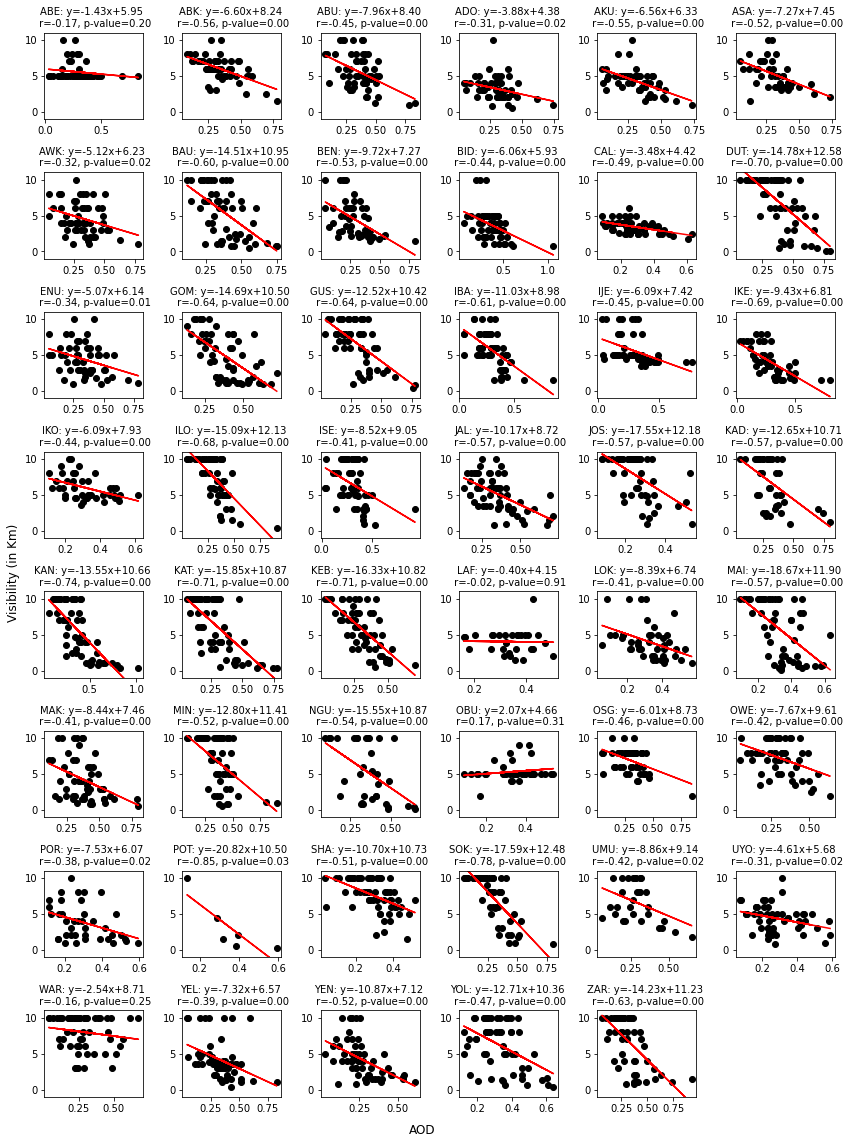

In [13]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

cor_ls = []

fig = plt.figure(figsize=(12,16))
# fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, j in enumerate(stn):
    merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
    merged.columns = ["Visibility", "AOD"]
    a=merged.dropna()
#     regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(a['AOD']),list(a['Visibility']))
    line = (slope*a['AOD'])+intercept
    
    # append correlation
    cor_ls.append([stn_lat[i], stn_lon[i], j, round(r_value, 2), round(p_value, 2)])
    
    ax = fig.add_subplot(8,6,i+1, )
    ax.scatter(merged['AOD'], merged['Visibility'], color = 'k')
    ax.plot(list(a['AOD']), line, 'r')
    title = j+': y={:.2f}x+{:.2f} \n '.format(slope,intercept)  + 'r={:.2f}, '.format(r_value) + 'p-value={:.2f}'.format(p_value)

    ax.set_title(title, fontsize = 10)
#     ax.set_xlim([0, 1.5])
    ax.set_ylim([-1, 11])
    
#     ax.set_ylabel('Visibility (in Km)')
#     ax.set_xlabel('bbb')
# fig.suptitle('a')
fig.supxlabel('AOD')
fig.supylabel('Visibility (in Km)')
fig.tight_layout(rect=(0.0,0,1,1))
    
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")    
#     plt.subplot(7,7,i+1)
#     plt.scatter(merged['AOD'], merged['Visibility'], color = 'k', ls='solid')
#     plt.title(j)
# plt.xlabel('AOD')
# plt.ylabel('Visibility (in Km)')
#     plt.text(j)
#     for j in stn:
        
#         plt.subplot(2, 3, i)
#         plt.scatter(merged['AOD'], merged['Visibility'])
# # #         plt.text(0.5, 0.5, str((2, 3, i)),
# # #                  fontsize=18, ha='center')
            


# # fig = plt.figure(figsize=(3,3))
# fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(15,15))
# plt.subplots_adjust(hspace=0.2)
# for j, ax in zip(stn, axs.ravel()):
#     print(j, ax)
#     merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
#     merged.columns = ["Visibility", "AOD"]
# #     merged['AOD'].scatter(merged['Visibility'],ax=ax)
#     plt.scatter(merged['AOD'], merged['Visibility'],ax=ax)
# #     plt.figure()
# #     plt.scatter(merged['AOD'], merged['Visibility'],color='k', ls='solid')
# #     plt.show()
    
    

In [14]:
cor_df = pd.DataFrame(cor_ls, columns=["Lat", "Long", "Station", "r_value", "p_value"])
cor_df['p'] = 2
cor_df.loc[cor_df['p_value'] > 0.05, 'p'] = 1
cor_df

,Lat,Long,Station,r_value,p_value,p
0,7.20,3.33,ABE,-0.17,0.20,1
1,6.25,8.19,ABK,-0.56,0.00,2
2,9.00,7.20,ABU,-0.45,0.00,2
3,7.60,5.20,ADO,-0.31,0.02,2
4,7.20,5.30,AKU,-0.55,0.00,2
5,6.82,6.23,ASA,-0.52,0.00,2
6,6.20,7.07,AWK,-0.32,0.02,2
7,10.28,9.82,BAU,-0.60,0.00,2
8,6.33,5.60,BEN,-0.53,0.00,2
9,9.80,6.00,BID,-0.44,0.00,2


In [15]:
# cor_df.to_csv("cor_files/day1/MULTI MODEL MEDIAN_1d.csv", index=False)
cor_df.to_csv("cor_files/day2/MULTI MODEL MEDIAN_2d.csv", index=False)
# cor_df.to_csv("cor_files/day3/MULTI MODEL MEDIAN_3d.csv", index=False)

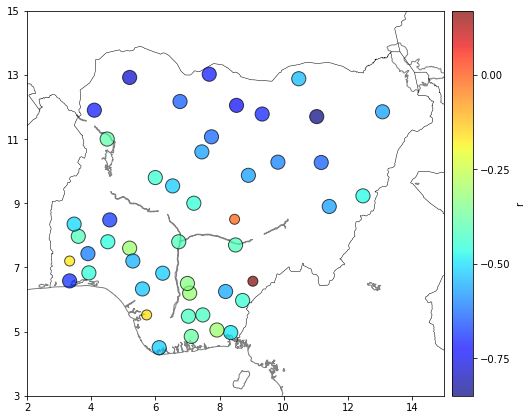

In [16]:
# plot coastlines with Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='h',
llcrnrlat=3, urcrnrlat=15,
llcrnrlon=2, urcrnrlon=15)
# m.drawmapboundary(fill_color='#DDEEFF')
# m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='grey', zorder=2)
m.drawcountries(color='black', zorder=2)
# m.shadedrelief()
m.drawstates()

# m.readshapefile('./nigeria_states/nigeria_states', 'nigeria_states')

# plot locations
m.scatter(cor_df["Long"], cor_df["Lat"], latlon=True, 
          c=cor_df["r_value"], s=cor_df["p"]*100,
          edgecolors="black", zorder=3,
          cmap='jet', alpha=0.7)

# create colorbar and legend
m.colorbar(label=r'r', ticks=np.linspace(1, -1, 9), shrink=0.755)
# plt.set_ticks(np.linspace(1, -1, 9))
plt.xticks(range(2, 16, 2))
plt.yticks(range(3, 16, 2))
plt.show()